In [2]:
!pip install textblob transformers torch --quiet
!python -m textblob.download_corpora

Finished.


[nltk_data] Error loading brown: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading punkt_tab: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [WinError 10054] An existing connection was
[nltk_data]     forcibly closed by the remote host>
[nltk_data] Error loading conll2000: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Error loading movie_reviews: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote hos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd

# Load the dataset
#url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=["label", "message"])

# Show head
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [26]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<Axes: xlabel='label', ylabel='count'>

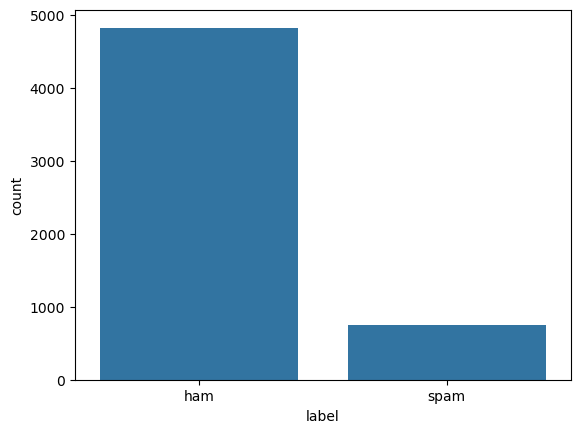

In [28]:
sns.countplot(df,x='label')

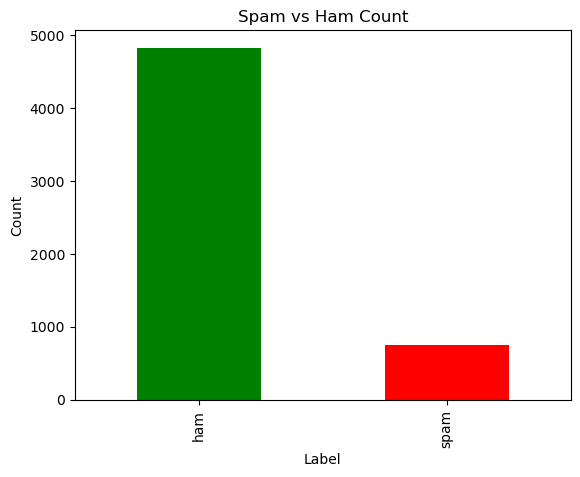

In [10]:
# Check class balance
df['label'].value_counts().plot(kind='bar', title='Spam vs Ham Count', color=['green', 'red'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [12]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [30]:
ham_balanced=ham.sample(n=len(spam), random_state=42)

In [32]:
df_balanced=pd.concat([ham_balanced,spam])

In [36]:
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [40]:
df_balanced.head()

,label,message
0,spam,WIN URGENT! Your mobile number has been awarde...
1,ham,Id onluy matters when getting on from offcampus
2,spam,SplashMobile: Choose from 1000s of gr8 tones e...
3,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
4,ham,Oh baby of the house. How come you dont have a...


<Axes: xlabel='label', ylabel='count'>

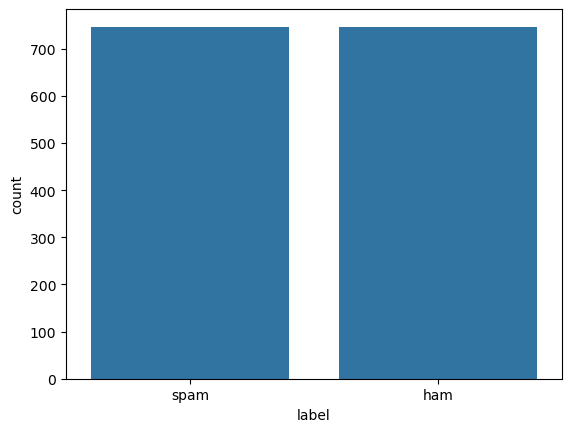

In [42]:
sns.countplot(df_balanced,x='label')

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
tfidf=TfidfVectorizer(stop_words='english',max_df=0.9)

In [80]:

# Features (X) and Labels (y)
X = df_balanced['message']
y = df_balanced['label']

In [82]:
X=tfidf.fit_transform(X)

In [94]:
from sklearn.model_selection import train_test_split


# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")'''


'print(f"Training samples: {len(X_train)}")\nprint(f"Testing samples: {len(X_test)}")'

In [96]:
from sklearn.linear_model import LogisticRegression

In [98]:
model=LogisticRegression()

In [100]:
model.fit(X_train,y_train)

LogisticRegression()

In [102]:
prediction=model.predict(X_test)

In [104]:
from sklearn.metrics import confusion_matrix,classification_report

In [108]:
print(confusion_matrix(y_test,prediction))

[[151   5]
 [ 15 128]]


In [110]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         ham       0.91      0.97      0.94       156
        spam       0.96      0.90      0.93       143

    accuracy                           0.93       299
   macro avg       0.94      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299

